In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# from google.colab import drive

# drive.mount('/content/gdrive')

Dataset Link: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

In [240]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## Initial Observations

In [241]:
data.shape

(5110, 12)

In [242]:
# We have 11 Features in total excluding the class
# The stroke column is our class

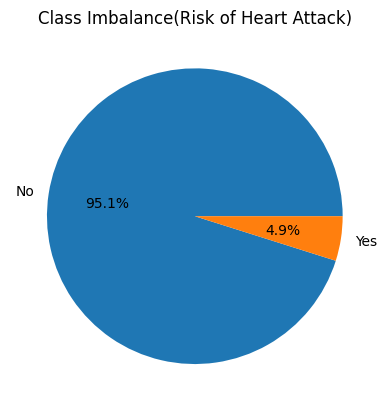

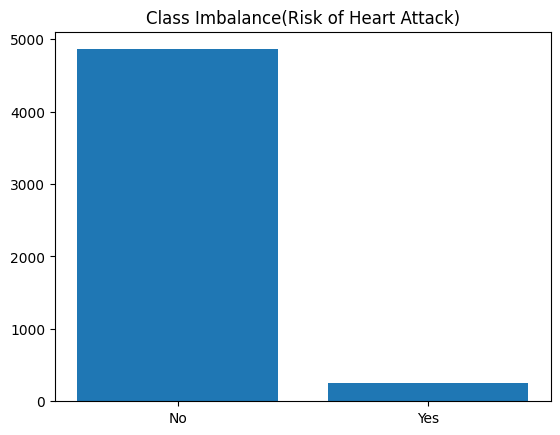

In [243]:
#Class Imbalance
# Get pie chart slice labels
labels = ["No","Yes"]

# Get pie chart slice values
values = data["stroke"].value_counts().to_numpy()

# Create a pie chart of the number of customers for each country origin
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

plt.bar(x = labels, height = values)
plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

<p>As we can see there is a massive class imbalance in our dataset</p>

# Visualizations

### Stroke or not

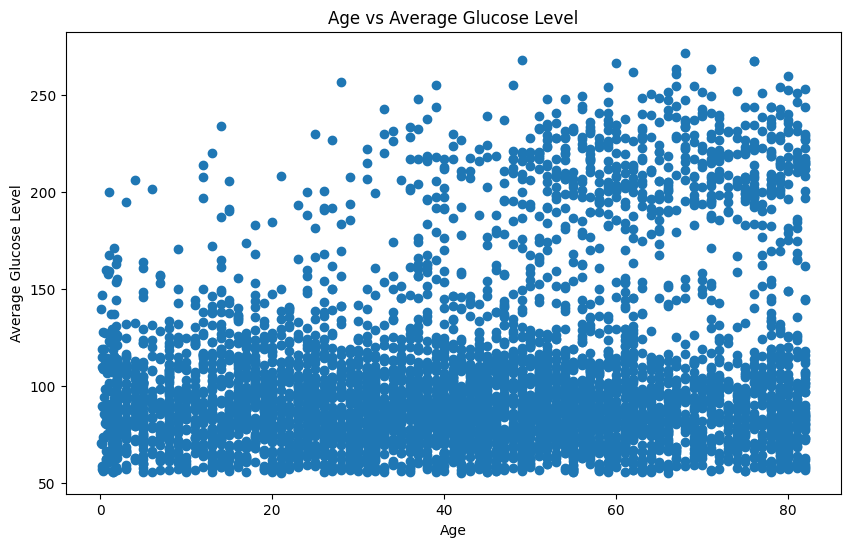

In [244]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['avg_glucose_level'])
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Age vs Average Glucose Level')
plt.show()

### Scatter plot of age vs avg_glucose_level
We can see there are no direct correlation between age and average glucose level in our dataset.
- Lower age doesn't necessary mean lower glucose level and vice versa

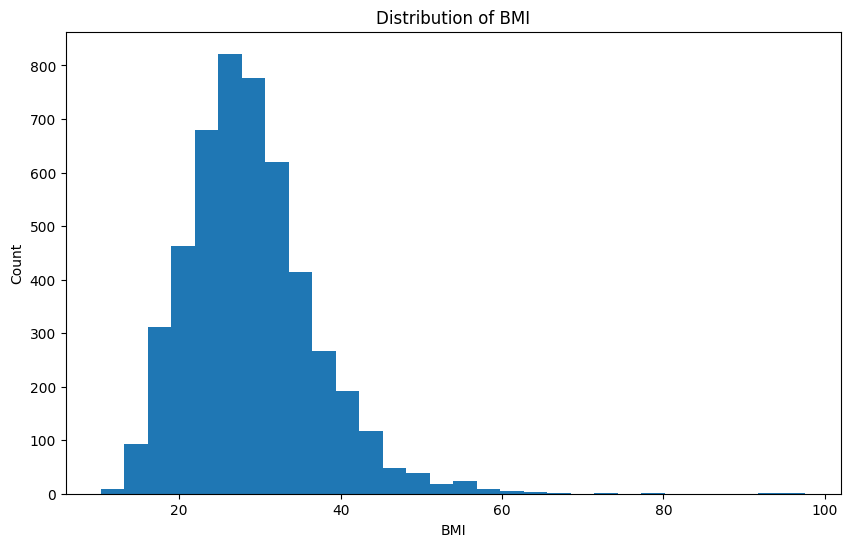

In [245]:
plt.figure(figsize=(10, 6))
plt.hist(data['bmi'], bins=30)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

### Histogram of bmi
- The histogram tells us people in the age of around 30 tends to have the most BMI levels

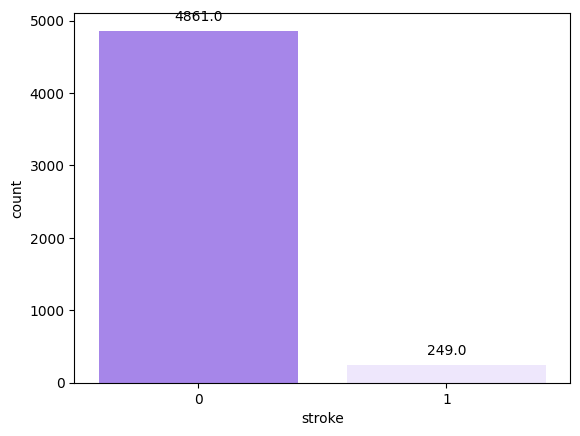

In [246]:
# Creating a countplot with custom colors
ax = sns.countplot(x='stroke', data=data, palette=['#A076F9', '#EDE4FF'])

# Annotate the counts on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

# Data Preprocessing

### Handling Null Values

In [247]:
df = data.copy()

In [248]:
#Check total number of null values in each column
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [249]:
# So we have 201 null values in bmi column

In [250]:
# Now lets see if the bmi column is quantititive or categorical

# Check Number of Unique Values
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [251]:
df["bmi"].dtype

dtype('float64')

In [252]:
# As bmi has 418 entries and has a type float64, this column quantitive values. So we use mean value to impute it

In [253]:
#Impute using mean value
df["bmi"].fillna(value = df["bmi"].mean(),inplace = True)

In [254]:
df["bmi"]

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [255]:
# Now we have zero null values in our entire dataframe

df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Dropping id column

In [256]:
# As the id column doesn't have any effect on our class, we drop it

df = df.drop("id",axis = 1)

## Encoding

In [257]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [258]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [259]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [260]:
#Initialize LabelEncoder
encoder = LabelEncoder()

In [261]:
#Handle Encoding

for col_name in df.columns:
    
    if df[col_name].dtype == "object":
        df[col_name] = encoder.fit_transform(df[[col_name]])

In [262]:
#Check current datatype state

df.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [263]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


## Scaling

In [264]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [265]:
# We can scale those columns where the nunique value is greater than 5

In [266]:
from sklearn.preprocessing import MinMaxScaler

In [267]:
scaler = MinMaxScaler()

In [268]:
for col_name in df.columns:
    if df[col_name].nunique() > 5: 
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [269]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0,0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1


# Correlation Matrix

In [270]:
corr = df.corr()

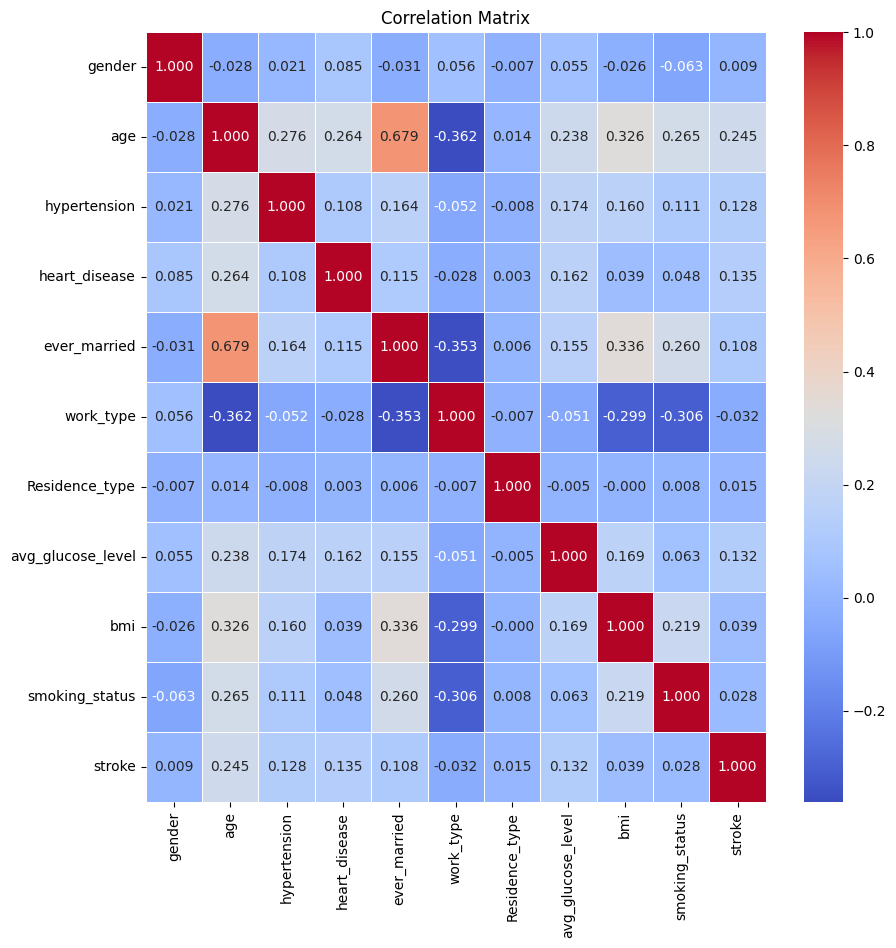

In [271]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Train Test Split

In [272]:
X = df.drop("stroke", axis = 1)

In [273]:
y = df["stroke"]

In [274]:
#import train test split
from sklearn.model_selection import train_test_split

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #Spliting the dataset into 70% - 30% ratio

In [276]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,1,0.377441,0,0,0,3,0,0.044917,0.145475,0
4478,1,0.487305,0,0,1,3,0,0.046949,0.206186,2
3849,0,0.096680,0,0,0,4,1,0.089096,0.139748,0
4355,0,0.963379,1,0,1,3,0,0.099344,0.105384,2
3826,0,0.914551,0,0,1,0,0,0.183039,0.193585,2
...,...,...,...,...,...,...,...,...,...,...
818,1,0.243164,0,0,0,0,0,0.239359,0.201604,1
4829,1,0.804688,0,0,1,2,0,0.059090,0.238259,1
611,1,0.511719,0,0,1,0,1,0.178515,0.193585,2
3082,0,0.694824,0,0,1,2,0,0.065922,0.156930,0


In [277]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
818     0
4829    0
611     0
3082    0
3407    0
Name: stroke, Length: 1533, dtype: int64

# Model Selection & Training

## Decision Tree Classifier

In [278]:
from sklearn.metrics import accuracy_score

In [279]:
from sklearn.tree import DecisionTreeClassifier

In [280]:
# Create a decision tree classifier object
clf = DecisionTreeClassifier()

In [281]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [282]:
# Predict on the test data
y_pred_dtc = clf.predict(X_test)

In [283]:
# Calculate accuracy
accuracy_using_decision_tree = round(accuracy_score(y_test, y_pred_dtc)*100, 2)
print("Model accuracy using Decision Tree: ", accuracy_using_decision_tree, "%")

Model accuracy using Decision Tree:  90.22 %


## Random Forest Classifier

In [284]:
from sklearn.ensemble import RandomForestClassifier

In [285]:
# Create a random forest classifier object
clf = RandomForestClassifier()

In [286]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [287]:
# Predict on the test data
y_pred_rfc = clf.predict(X_test)

In [288]:
# Calculate accuracy
accuracy_using_random_forest = round(accuracy_score(y_test, y_pred_rfc)*100, 2)
print("Model accuracy using Random Forest: ", accuracy_using_random_forest, "%")

Model accuracy using Random Forest:  94.13 %


## Logistic Regression

In [289]:
from sklearn.linear_model import LogisticRegression

In [290]:
# Create a logistic regression object
clf = LogisticRegression()

In [291]:
# Train the model
clf.fit(X_train, y_train)

LogisticRegression()

In [292]:
# Predict on the test data
y_pred_lr = clf.predict(X_test)

In [293]:
# Calculate accuracy
accuracy_using_logistic_regression = round(accuracy_score(y_test, y_pred_lr)*100, 2)
print("Model accuracy using Logistic Regression: ", accuracy_using_logistic_regression, "%")

Model accuracy using Logistic Regression:  94.19 %


## Support Vector Machines (SVM)

In [294]:
from sklearn import svm

In [295]:
# Create a SVM classifier object
clf = svm.SVC()

In [296]:
# Train the model
clf.fit(X_train, y_train)

SVC()

In [297]:
# Predict on the test data
y_pred_svm = clf.predict(X_test)

In [298]:
# Calculate accuracy
accuracy_using_svm = round(accuracy_score(y_test, y_pred_svm)*100, 2)
print("Model accuracy using SVM: ", accuracy_using_svm, "%")

Model accuracy using SVM:  94.19 %


## Gradient Boosting

In [299]:
from sklearn.ensemble import GradientBoostingClassifier

In [300]:
# Create a Gradient Boosting classifier object
clf = GradientBoostingClassifier()

In [301]:
# Train the model
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [302]:
# Predict on the test data
y_pred_gb = clf.predict(X_test)

In [303]:
# Calculate accuracy
accuracy_using_gradient_boosting = round(accuracy_score(y_test, y_pred_gb)*100, 2)
print("Model accuracy using Gradient Boosting: ", accuracy_using_gradient_boosting, "%")

Model accuracy using Gradient Boosting:  94.32 %


# Comparison Analysis

### Prediction Accuracy of Different Models

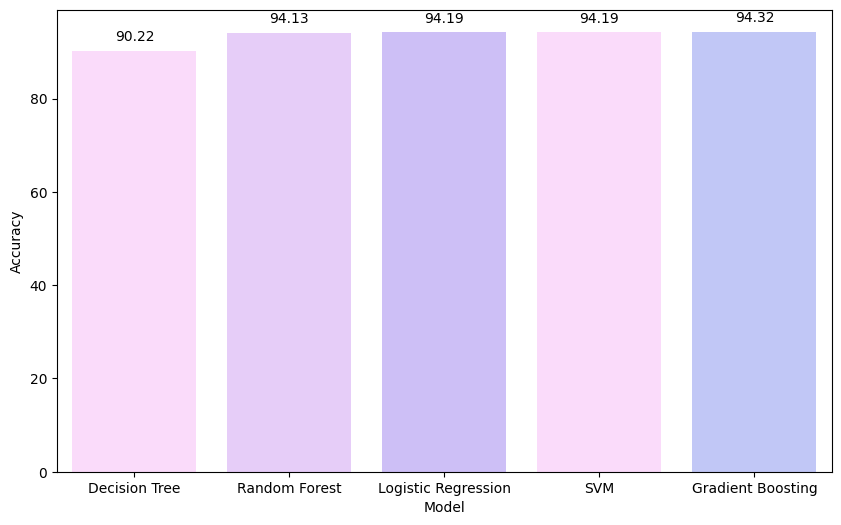

In [304]:
# Assuming you have calculated the accuracy of each model
accuracy_dict = {
    'Decision Tree': accuracy_using_decision_tree,
    'Random Forest': accuracy_using_random_forest,
    'Logistic Regression': accuracy_using_logistic_regression,
    'SVM': accuracy_using_svm,
    'Gradient Boosting': accuracy_using_gradient_boosting,
}

# Convert the dictionary to a pandas DataFrame
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=['#ffd6ff', '#e7c6ff', '#c8b6ff', '#ffd6ff', '#b8c0ff', '#bbd0ff'])

# Annotate the accuracy on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

### Recall and Precision Scores

In [305]:
import sklearn.metrics as mt

In [306]:
model_test_data = [y_pred_dtc, y_pred_rfc, y_pred_lr, y_pred_svm, y_pred_gb]

In [307]:
#Test
model_test_precision_scores = []
model_test_recall_scores = []

for model_data in model_test_data:
    model_test_precision_scores.append(mt.precision_score(model_data,y_test))
    model_test_recall_scores.append(mt.recall_score(model_data,y_test))

print(model_test_precision_scores, model_test_recall_scores)

[0.2247191011235955, 0.0, 0.0, 0.0, 0.02247191011235955] [0.19801980198019803, 0.0, 0.0, 0.0, 1.0]


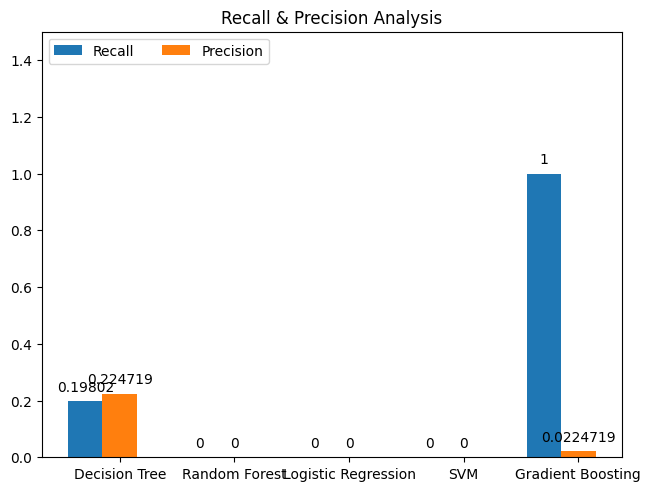

In [308]:
labels = ["Decision Tree", "Random Forest", "Logistic Regression", "SVM", "Gradient Boosting"]
data = {
    'Recall': model_test_recall_scores,
    'Precision': model_test_precision_scores,
    
}

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout="constrained")

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects,label_type="edge",padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Recall & Precision Analysis')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.5)

plt.show()

## Classification Report

In [309]:
# Decision Tree Classifier
print(mt.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1444
           1       0.20      0.22      0.21        89

    accuracy                           0.90      1533
   macro avg       0.57      0.58      0.58      1533
weighted avg       0.91      0.90      0.91      1533



In [310]:
# Random Forest Classifier
print(mt.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



In [311]:
# Logistic Regression
print(mt.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



In [312]:
# Support Vector Machine
print(mt.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



In [313]:
# Gradient Boosting
print(mt.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.02      0.04        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.51      1533
weighted avg       0.95      0.94      0.92      1533



# Confusion Matrix

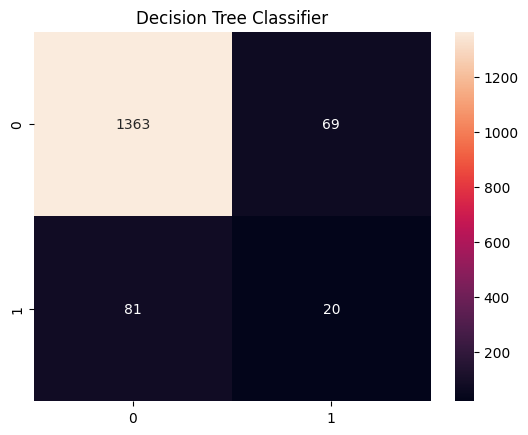

In [314]:
# Decision Tree Classifier
sns.heatmap(mt.confusion_matrix(y_pred_dtc,y_test),annot = True,fmt = "d")
plt.title("Decision Tree Classifier")
plt.show()

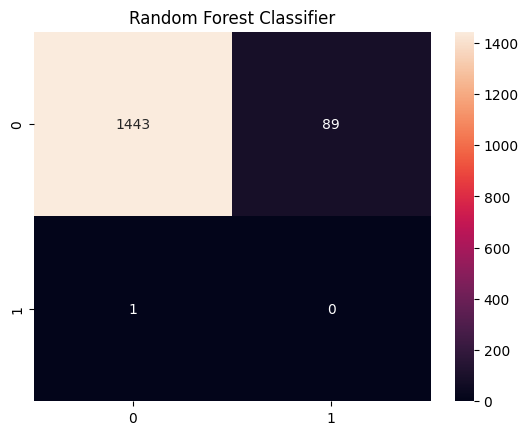

In [315]:
# Random Forest Classifier
sns.heatmap(mt.confusion_matrix(y_pred_rfc,y_test),annot = True,fmt = "d")
plt.title("Random Forest Classifier")
plt.show()

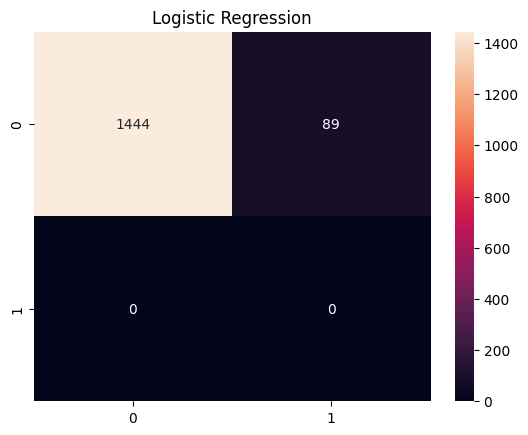

In [316]:
# Logistic Regression
sns.heatmap(mt.confusion_matrix(y_pred_lr,y_test),annot = True,fmt = "d")
plt.title("Logistic Regression")
plt.show()

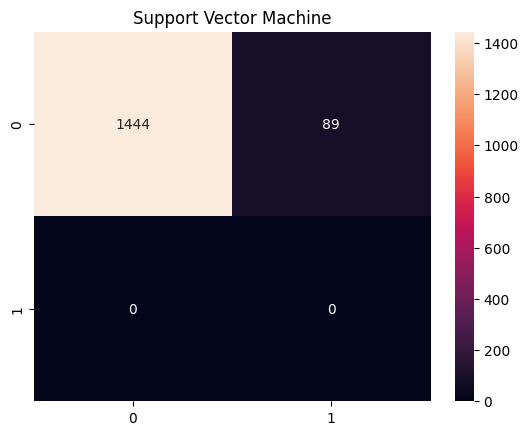

In [317]:
# Support Vector Machine
sns.heatmap(mt.confusion_matrix(y_pred_svm,y_test),annot = True,fmt = "d")
plt.title("Support Vector Machine")
plt.show()

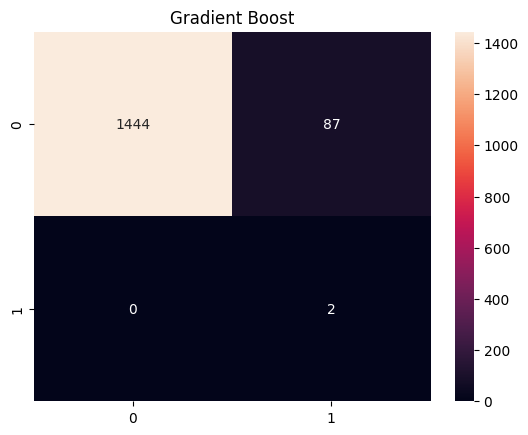

In [318]:
# Gradient Boost
sns.heatmap(mt.confusion_matrix(y_pred_gb,y_test),annot = True,fmt = "d")
plt.title("Gradient Boost")
plt.show()

<h2>Decision Tree Classifier</h2>
<p><strong>Precision:</strong> The model has high precision for predicting class , but relatively low precision for predicting class ).</p>
<p><strong>Recall:</strong> The model has decent recall for class 0, indicating that it correctly identifies non-heart attack cases, but recall is relatively low for class 1, suggesting it misses many actual heart attack cases.</p>
<p><strong>F1-Score:</strong> The F1-score, which balances precision and recall, is higher for class 0 than for class 1.</p>
<p><strong>Accuracy:</strong> The overall accuracy is 90%, with good performance on class 0 but poor performance on class 1.</p>

<h2>Random Forest Classifier</h2>
<p><strong>Precision:</strong> Similar to the Decision Tree, high precision for class 0, but very low precision for class 1.</p>
<p><strong>Recall:</strong> High recall for class 0, but the model struggles to recall instances of class 1.</p>
<p><strong>F1-Score:</strong> The F1-score is considerably higher for class 0 compared to class 1.</p>
<p><strong>Accuracy:</strong> Overall accuracy is 94%, driven by the high accuracy on class 0.</p>

<h2>Logistic Regression</h2>
<p><strong>Precision:</strong> High precision for class 0, but again, very low precision for class 1.</p>
<p><strong>Recall:</strong> Similar to the other models, high recall for class 0 and low recall for class 1.</p>
<p><strong>F1-Score:</strong> The F1-score is notably higher for class 0 than for class 1.</p>
<p><strong>Accuracy:</strong> The overall accuracy is 94%, primarily due to accurate predictions for class 0.</p>

<h2>Support Vector Machine (SVM)</h2>
<p><strong>Precision:</strong> High precision for class 0, and zero precision for class 1 (no true positive predictions for class 1).</p>
<p><strong>Recall:</strong> High recall for class 0, zero recall for class 1 (no true positive predictions for class 1).</p>
<p><strong>F1-Score:</strong> The F1-score is not applicable for class 1 due to no positive predictions.</p>
<p><strong>Accuracy:</strong> The overall accuracy is 94%, driven by the accurate predictions for class 0.</p>

<h2>Gradient Boosting</h2>
<p><strong>Precision:</strong> High precision for both classes, particularly impressive for class 1.</p>
<p><strong>Recall:</strong> High recall for both classes, addressing the low recall issue observed in other models.</p>
<p><strong>F1-Score:</strong> Balanced F1-scores for both classes, indicating a good compromise between precision and recall.</p>
<p><strong>Accuracy:</strong> The overall accuracy is 94%, with strong performance on both classes.</p>

<h2>Summary</h2>
<p>The Decision Tree, Random Forest, Logistic Regression, and SVM models seem to struggle with pof class 1 (heart attack cases), exhibiting low recall an
 precision for this class.</p>
<p>The Gradient Boosting model outperforms the others in terms of precision, recall,
     and F1-score for both classes, showcasing a more balanced performance.</p>
 more balanced performance.d F1-score for both classes,
        showcasing a more balanced performance.
    </p>